In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

import linalg_tools

Problem 2
=========

In [ ]:
# a
A = np.array([[-1, 2, 0],
[5, 1, -2],[6, 3, 4]])
rankA = np.linalg.matrix_rank(A)

# b
B = np. array([[3, 2, 2, -5],
[0.6, 1.5, 1.5, -5.4],
[1.2, -0.3, -0.3, 2.4]])
rankB = np.linalg.matrix_rank(B)

print('The rank of A is ', rankA)
print('The rank of B is ', rankB)

Problem 3
=========

In [ ]:
# a
A_augmented = np.array([[2, -1, 3, 0],
[-1, 4, -1, 10],
[0, 10, 15, 50],
[20, 10, 1, 40]])

solutions = linalg_tools.lin_sol(A_augmented)

print('About the first system...')
if solutions == 'unique solution':
    A = A_augmented[0:-1, 0:-1]
    b = A_augmented[0:-1, -1]
    X = np.linalg.solve(A, b)
    print('The solutions are ', X)
else:
    print('The system has ' + solutions + '\n')

# b
A_augmented = np.array([[2, -1, 3, 0],
[-1, 4, -1, 10],
[0, 10, 15, 50],
[20, 10, 1, 40]])

solutions = linalg_tools.lin_sol(A_augmented)

print('About the second system...')

if solutions == 'unique solution':
    A = A_augmented[0:-1, 0:-1]
    b = A_augmented[0:-1, -1]
    X = np.linalg.solve(A, b)
    print('The solutions are ', X)
else:
    print('The system has ' + solutions + '\n')

Problem 4
=========

In [ ]:
# a
A = np.array([[-5, 0], [0, 3]])
eigval_A, eigvect_A = np.linalg.eig(A)

# b
B = np.array([[-1, 2], [5, 2]])
eigval_B, eigvect_B = np.linalg.eig(B)

print('The eigenvalues of A are \n', eigval_A)
print('The eigenvectors of A are \n', eigvect_A, '\n')

print('The eigenvalues of A are \n', eigval_B)
print('The eigenvectors of A are \n', eigvect_B, '\n')

Problem 5
=============

In [ ]:
# a
A = np.array([[1, -3], [4, 10]])
diag_A, eigvects_A = linalg_tools.diagonalize(A)

# b
B = np.array([[4, 3, 6],
[3, -8, 15],
[6, 15, 10]])
diag_B, eigvects_B = linalg_tools.diagonalize(B)

print('The matrix that diagonalizes A is \n', diag_A, '\n')
print('The matrix that diagonalizes B is \n', diag_B, '\n')

#%% Proof
A_proof = eigvects_A@diag_A@np.linalg.inv(eigvects_A)
print('A proof can be made getting the matrix from diag_matrix \n')
print(A_proof, '\n')

B_proof = eigvects_B@diag_B@np.linalg.inv(eigvects_B)
print('A proof can be made getting the matrix from diag_matrix \n')
print(B_proof, '\n')

Problem 6
=========

In [ ]:
###  a

A = np.array([[0, 1], [1, 1], [1, 0]])
U_a, Sigma_a, V_a = np.linalg.svd(A, full_matrices=False)

print('The block diagonal matrix for A is \n', Sigma_a, '\n')

### b
B = np.array([[0, 1, 0, 0], [0, 0, 4, 0],
 [0, 0, 0, 9], 
 [0, 0, 0, 0]])

U_b, Sigma_b, V_b = np.linalg.svd(B, full_matrices=False)

print('The block diagonal matrix for A is \n', Sigma_b, '\n')


## Proof

In [ ]:
A_proof = U_a*Sigma_a@V_a.T
print('A proof for A can be made getting the matrix from block diag_matrix \n')
print(A_proof, '\n')

B_proof = U_b*Sigma_b@V_b.T
print('A proof for B can be made getting the matrix from block diag_matrix \n')
print(B_proof, '\n')

Problem 8
==========

In [12]:
# Functions definitions
x1, x2, x3 = sp.symbols("x1 x2 x3")
f1 = x1**2 + 6*x1*x2 + x2**2
f2 = 2*x1**2 + 6*x1*x2 -2*x2**2

# Functions evaluations
lam_f1 = sp.lambdify([x1, x2], f1, modules=['numpy'])
lam_f2 = sp.lambdify([x1, x2], f2, modules=['numpy'])

x_vals = np.linspace(-20, 20, 100)
y_vals = np.linspace(-20, 20, 100)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Symbolic to real values
f_vals_1 = lam_f1(x_vals, y_vals)
f_vals_2 = lam_f2(x_vals, y_vals)

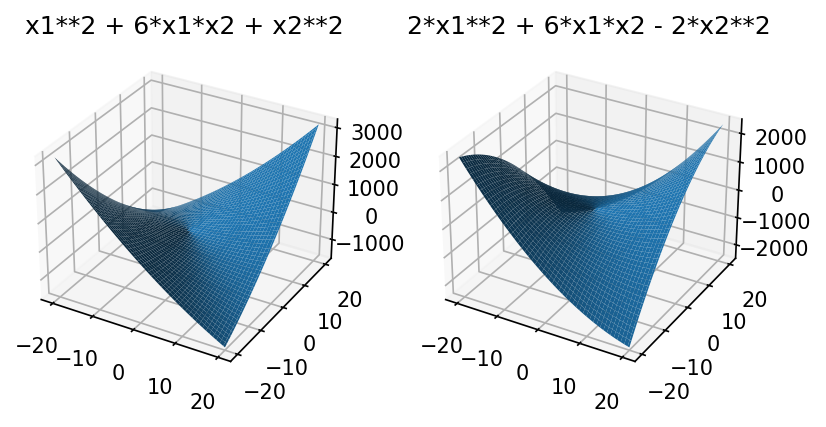

In [13]:

fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
ax[0].plot_surface(x_vals, y_vals, f_vals_1)
ax[0].set_title(f1)

ax[1].plot_surface(x_vals, y_vals, f_vals_2)
ax[1].set_title(f2)

fig_dpi = 150
fig_width = 16.2/2.54
fig_height = 18.6/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
plt.show()

According to the graphs, both f1 and f2 are indefinite, this can checked seeing the eigenvalves of the matrix Q for each function.

In [ ]:
Q1 = np.array([[1, 4], [2, 1]])

f1_eigvals, f1_eigvects = np.linalg.eig(Q1)

is_positive = np.allclose(f1_eigvals > 0, True)
is_negative = np.allclose(f1_eigvals < 0, True)

print('Is ', f1, ' positive?', is_positive)
print('Is ', f1, ' negative?', is_negative)

In [ ]:
Q2 = np.array([[2, 2], [4, -2]])

f2_eigvals, f2_eigvects = np.linalg.eig(Q1)

is_positive = np.allclose(f2_eigvals > 0, True)
is_negative = np.allclose(f2_eigvals < 0, True)

print('Is ', f2, ' positive?', is_positive)
print('Is ', f2, ' negative?', is_negative)

In [ ]:
Q3 = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
f3_eigvals, f3_eigvects = np.linalg.eig(Q3)

is_positive = np.allclose(f3_eigvals > 0, True)
is_negative = np.allclose(f3_eigvals < 0, True)

print('Is ', f3, ' positive?', is_positive)
print('Is ', f3, ' negative?', is_negative)

In [ ]:
Q4 = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
f4_eigvals, f4_eigvects = np.linalg.eig(Q4)

is_positive = np.allclose(f4_eigvals > 0, True)
is_negative = np.allclose(f4_eigvals < 0, True)

print('Is ', f4, ' positive?', is_positive)
print('Is ', f4, ' negative?', is_negative)

Problem 9
=========

In [15]:
# Functions definitions
step = 0.05
gradient_step = 1
x1, x2 = sp.symbols("x1 x2")
f = (4*x1**4 + 2*x1**3*x2 - 6*x1**2*x2**2 + x2**4)/(x1**4+x2**4+1)

# Functions evaluations
lam_f = sp.lambdify([x1, x2], f, modules=['numpy'])

x_vals = np.arange(-3, 3, step)
y_vals = np.arange(-3, 3, step)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Symbolic to real values
f_vals = lam_f(x_vals, y_vals)
gradient_x, gradient_y = np.gradient(f_vals, gradient_step)

In [16]:
f

(4*x1**4 + 2*x1**3*x2 - 6*x1**2*x2**2 + x2**4)/(x1**4 + x2**4 + 1)

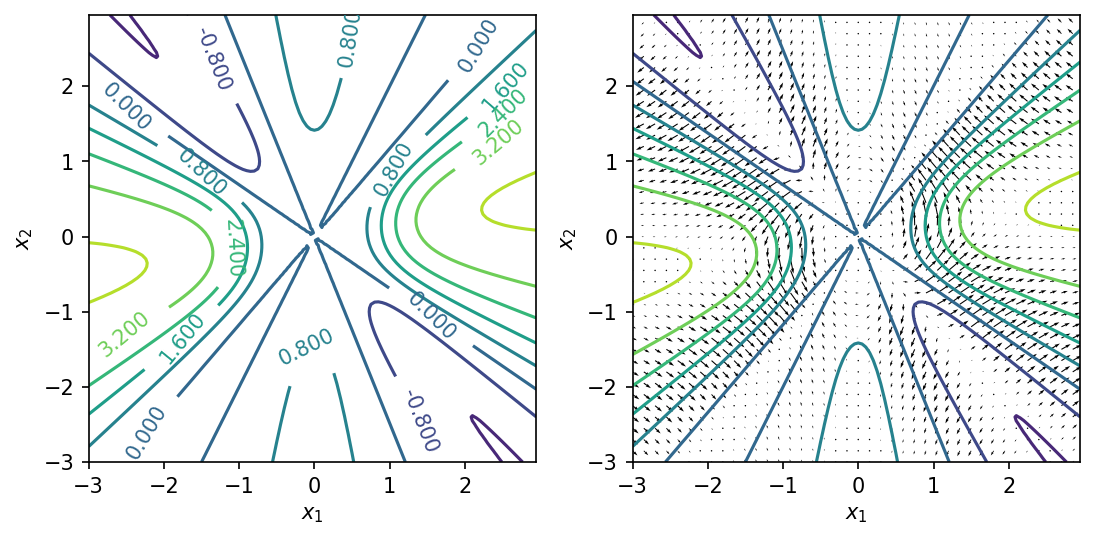

In [17]:
fig, ax = plt.subplots(1,2)

contour = ax[0].contour (x_vals, y_vals, f_vals) 
ax[0].set_xlabel( '$x_1$' ) 
ax[0].set_ylabel( '$x_2$' )
ax[0].clabel(contour)

skip=(slice(None,None,3),slice(None,None,3))
ax[1].contour (x_vals, y_vals, f_vals)
ax[1].quiver(x_vals[skip], y_vals[skip], gradient_x[skip], gradient_y[skip], minshaft=1.5, minlength=1.5)
ax[1].set_xlabel( '$x_1$' ) 
ax[1].set_ylabel( '$x_2$' )

fig_dpi = 150
fig_width = 18.8/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()

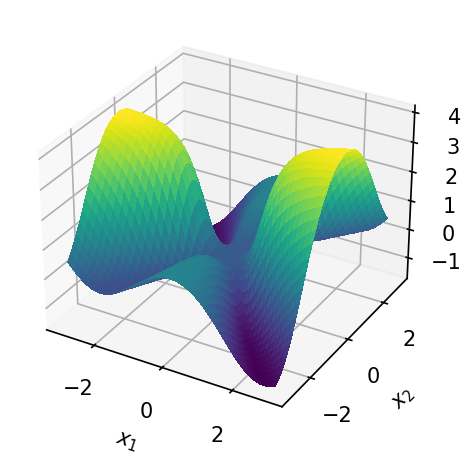

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_vals, y_vals, f_vals, cmap=cm.viridis,
                       linewidth=0.1, antialiased=False)
ax.set_xlabel( '$x_1$' ) 
ax.set_ylabel( '$x_2$' )

fig_dpi = 150
fig_width = 9.4/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))

plt.show()